In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import genlaguerre, gamma
from scipy.interpolate import interp1d
from mpmath import *
mp.pretty = True
###########################
# Setup Plotting Defaults #
###########################
# For more options see https://matplotlib.org/users/customizing.html

# Commands for high detail plots (much larger in file size though)
#mpl.rcParams['agg.path.chunksize'] = 1000
#mpl.rcParams['savefig.dpi'] = 1000

# Line styles
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['lines.antialiased'] = True
mpl.rcParams['lines.dashed_pattern'] = 2.8, 1.5
mpl.rcParams['lines.dashdot_pattern'] = 4.8, 1.5, 0.8, 1.5
mpl.rcParams['lines.dotted_pattern'] = 1.1, 1.1
mpl.rcParams['lines.scale_dashes'] = True

# Default colors
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler('color',['cornflowerblue','forestgreen','maroon','goldenrod','firebrick','mediumorchid', 'navy', 'brown'])


# Fonts
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Helvetica'
mpl.rcParams['font.sans-serif'] = 'CMU Sans Serif, DejaVu Sans, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif'
mpl.rcParams['text.usetex'] = True

# Axes
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['axes.labelsize'] = 24
mpl.rcParams['axes.labelpad'] = 10.0
                                                  
                                                  
# Tick marks - the essence of life
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.minor.visible'] = True

# Legend
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 0.8
#mpl.rcParams['legend.edgecolor'] = 'black'
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.borderpad'] = 0.4 # border whitespace
mpl.rcParams['legend.labelspacing'] = 0.5 # the vertical space between the legend entries
mpl.rcParams['legend.handlelength'] = 1.5 # the length of the legend lines
mpl.rcParams['legend.handleheight'] = 0.7 # the height of the legend handle
mpl.rcParams['legend.handletextpad'] = 0.5 # the space between the legend line and legend text
mpl.rcParams['legend.borderaxespad'] = 0.5 # the border between the axes and legend edge
mpl.rcParams['legend.columnspacing'] = 2.0 # column separation


# Figure size
#mpl.rcParams['figure.figsize'] = 10, 6

# Save details
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.pad_inches'] = 0.1

GNew = 7484169213.942707 # 1 / (M_SM * eV)
hbar = 6.58e-16
ckm = 2.998e5

In [2]:
def WF_smallA(n, l, m, M, mu, r):
    # |R|^2, r in units of /(G*M)
    alph = GNew * M * mu
    a0 = 1 / (mu * alph) / (GNew * M)
    nm = (2 / (n * a0))**3 * np.math.factorial(n - l - 1) / (2 * n * np.math.factorial(n + l)) * ( np.exp( - r / (n * a0)) * (2 * r / (n * a0))**l * genlaguerre(n-l-1, 2 * l + 1)(2 * r / (n * a0)) )**2
    return nm

def WF_small_test2(n, l, m, M, mu, a, r):
    # |R|^2, r in units of /(G*M)
    alph = GNew * M * mu
    rp = (1 + np.sqrt(1 - a**2))
    rm = (1 - np.sqrt(1 - a**2))
    a0 = 1 / (mu * alph) / (GNew * M)
    xx = 2 * r / (n * a0) + 0j
    
    # nm = np.exp(-xx/2) * xx**l * hyp1f1(l+1 - n, 2 * l + 2, xx) # genlaguerre(l+1 - n, 2 * l + 2)(xx)
#     z = (r - rp) / (r - rm)
#     Pp = alph * (a * m - 2 * rp * mu) / (rp - rm)
    nm = np.zeros(len(r), dtype=complex)
    for i in range(len(r)):   
        # nm[i] = (z[i] / (1 + z[i]))**(Pp * 1j) * hyp2f1(-l, l+1, 1- 2j * Pp, 1+z[i])
        nm[i] = np.exp(-xx[i]/2) * xx[i]**l * hyp1f1(l+1 - n, 2 * l + 2, xx[i])

    norm = np.trapz(nm * np.conjugate(nm) * r**2, r)


    return nm * np.conjugate(nm) / norm

def WF_NEAR_test2(n, l, m, M, mu, a, r):
    # |R|^2, r in units of /(G*M)
    alph = GNew * M * mu
    rp = (1 + np.sqrt(1 - a**2))
    rm = (1 - np.sqrt(1 - a**2))
    # a0 = 1 / (mu * alph) / (GNew * M)
    # xx = 2 * r / (n * a0) + 0j
    
    # nm = np.exp(-xx/2) * xx**l * hyp1f1(l+1 - n, 2 * l + 2, xx) # genlaguerre(l+1 - n, 2 * l + 2)(xx)
    z = (r - rp) / (r - rm)
    Pp = alph * (a * m - 2 * rp * GNew * M * mu * (1 + 1j)) / (rp - rm)
    
    nm = np.zeros(len(r), dtype=complex)
    for i in range(len(r)):  
        if i == 0:
            nm[i] = 0 + 0j
        else:
            nm[i] = (z[i] / (1 + z[i]))**(Pp * 1j) * hyp2f1(-l, l+1, 1- 2j * Pp, 1+z[i])
    
    norm = np.trapz(nm * np.conjugate(nm) * r**2, r)

    return nm * np.conjugate(nm) / norm
    
def WF_FAR(n, l, m, M, mu, a, r, erg):
    r= np.vectorize(complex)(r)
    alph = GNew * M * mu
    a0 = 1 / (mu * alph) / (GNew * M)
    k = np.sqrt(erg**2 - alph**2)

    preF = 2 * k * np.exp(np.pi / (2 * k * a0)) * np.abs(gamma(l + 1 - j / (k * a0))) / factorial(2 * l + 1)
    
    rad = np.zeros(len(r), dtype=complex)
    
    for i in range(len(r)):  
        rad[i] = preF * (2 * k * r[i])**l * np.exp(-1j * k * r[i]) * hyp1f1(1j / (k * a0) + l + 1, 2 * l + 2, 2*1j * k * r[i])

    return rad * np.conjugate(rad) 

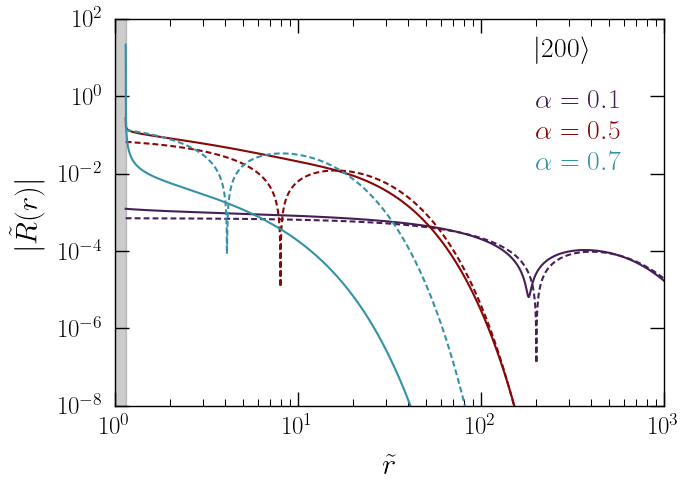

In [ ]:
M=14.8
mu=5e-12
a=0.99
GNew = 7.484169213942707e9
dirN = "/Users/samuelwitte/Dropbox/Axion_SR/src/"

colorL = ["#451F55", "#880707", "#3491A9", "#5D9873", "#A1E887", "#6E71C4", "#393A10"]

fig, axs = plt.subplots(1, figsize=(7,5))

n=2
l=0
m=0
# fileL = np.loadtxt(dirN + "test_store/WF__0.8232586135336978_n_1_l_0_m_0_.dat")
fileL = np.loadtxt(dirN + "test_store/WF__0.1_n_2_l_0_m_0_.dat")
mu = 0.1 / (GNew * M)
plt.plot(fileL[:,0], np.sqrt(fileL[:,1]), colorL[0])
out = WF_small_test2(n, l, m, M, mu, a, fileL[:,0])
plt.plot(fileL[:,0], np.sqrt(out), colorL[0], ls="--")


n=2
l=0
m=0
# fileL = np.loadtxt(dirN + "test_store/WF__0.8232586135336978_n_2_l_0_m_0_.dat")
fileL = np.loadtxt(dirN + "test_store/WF__0.49999999999999994_n_2_l_0_m_0_.dat")
mu = 0.5 / (GNew * M)
plt.plot(fileL[:,0], np.sqrt((fileL[:,1])), colorL[1])
# fileL = np.loadtxt(dirN + "test_store/WF__0.8232586135336974_n_2_l_0_m_0_.dat")
# plt.plot(fileL[:,0], np.sqrt((fileL[:,1])), "k")
out = WF_small_test2(n, l, m, M, mu, a, fileL[:,0] )
plt.plot(fileL[:,0], np.sqrt(out), colorL[1],ls= "--")


n=2
l=0
m=0
# fileL = np.loadtxt(dirN + "test_store/WF__0.8232586135336978_n_3_l_0_m_0_.dat")
# fileL = np.loadtxt(dirN + "test_store/WF__0.8232586135336974_n_3_l_0_m_0_.dat")
fileL = np.loadtxt(dirN + "test_store/WF__0.7_n_2_l_0_m_0_.dat")
mu = 0.7 / (GNew * M)
plt.plot(fileL[:,0], np.sqrt(fileL[:,1]), colorL[2])
out = WF_small_test2(n, l, m, M, mu, a, fileL[:,0])
plt.plot(fileL[:,0], np.sqrt(out), colorL[2], ls="--")




xx = np.linspace(1, fileL[0,0], 10)
axs.fill_between(x=xx, y1=0, y2=1e4, color='k',  interpolate=True, alpha=.2)


plt.text(200, 1e1, r"$\left. |200 \right>$", rotation=0, fontsize=20, c="k")
plt.text(200, 10**-0.3,  r"$\alpha = 0.1$", rotation=0, fontsize=20, c=colorL[0])
plt.text(200, 10**-1.1,  r"$\alpha = 0.5$", rotation=0, fontsize=20, c=colorL[1])
plt.text(200, 10**-1.9,  r"$\alpha = 0.7$", rotation=0, fontsize=20, c=colorL[2])

plt.yscale("log")
plt.xscale("log")
plt.ylim([1e-8,1e2])
plt.xlim([1.0, 1000])



plt.xlabel(r"$\tilde{r}$", fontsize=22)
plt.ylabel(r"$|\tilde{R}(r)|$", fontsize=22)

plt.tight_layout()
plt.savefig("plts/WF_1.pdf", dpi=200)

In [374]:
fileL = np.loadtxt(dirN + "test_store/WF__0.8232586135336977_n_2_l_0_m_0_.dat")
fileL[0,:]

array([   1.43588989, 1132.66236414])

In [376]:
fileL = np.loadtxt(dirN + "test_store/WF__0.8232586135336974_n_2_l_0_m_0_.dat")
fileL[0,:]

array([   1.43588989, 1132.72019066])

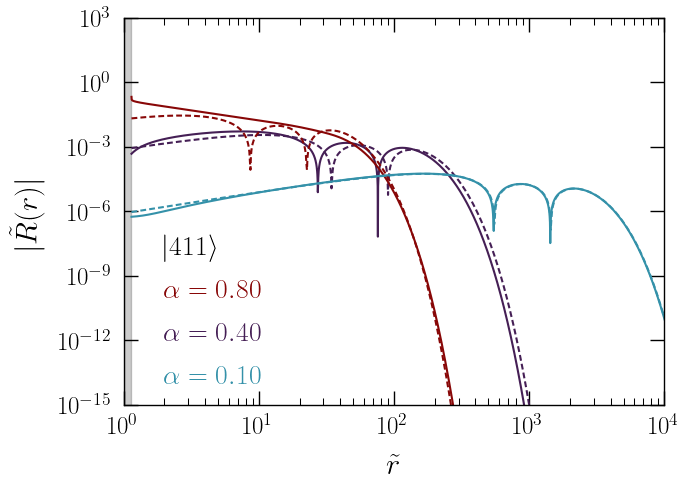

In [ ]:
M=22
a=0.99
dirN = "/Users/samuelwitte/Dropbox/Axion_SR/src/"
n=4
l=1
m=1

fig, axs = plt.subplots(1, figsize=(7,5))

mu = 0.4 / (GNew * M)

fileL = np.loadtxt(dirN + "test_store/WF__0.4_n_4_l_1_m_1_.dat")
rlist = np.logspace(np.log10(fileL[0,0]), 4, 1000)


plt.plot(fileL[:,0], np.sqrt(fileL[:,1]), colorL[0])
out = WF_small_test2(n, l, m, M, mu, a, rlist)
plt.plot(rlist, np.sqrt(out), colorL[0], ls="--")

mu = 0.8 / (GNew * M)
fileL = np.loadtxt(dirN + "test_store/WF__0.8_n_4_l_1_m_1_.dat")
plt.plot(fileL[:,0], np.sqrt(fileL[:,1]), colorL[1])
out = WF_small_test2(n, l, m, M, mu, a, rlist)
plt.plot(rlist, np.sqrt(out), colorL[1], ls ="--")

mu = 0.1 / (GNew * M)
fileL = np.loadtxt(dirN + "test_store/WF__0.1_n_4_l_1_m_1_.dat")
plt.plot(fileL[:,0], np.sqrt(fileL[:,1]), colorL[2])
out = WF_small_test2(n, l, m, M, mu, a, rlist)
plt.plot(rlist, np.sqrt(out), colorL[2], ls="--")

xx = np.linspace(1, fileL[0,0], 10)
axs.fill_between(x=xx, y1=0, y2=1e4, color='k',  interpolate=True, alpha=.2)

plt.text(2, 1e-8, r"$\left. |411 \right>$", rotation=0, fontsize=20, c="k")

plt.text(2, 1e-10, r"$\alpha = 0.80$", rotation=0, fontsize=20, c=colorL[1])
plt.text(2, 1e-12, r"$\alpha = 0.40$", rotation=0, fontsize=20, c=colorL[0])
plt.text(2, 1e-14, r"$\alpha = 0.10$", rotation=0, fontsize=20, c=colorL[2])



plt.yscale("log")
plt.xscale("log")
plt.ylim([1e-15,1e3])
plt.xlim([1,1e4])

plt.xlabel(r"$\tilde{r}$", fontsize=22)
plt.ylabel(r"$|\tilde{R}(r)|$", fontsize=22)

plt.tight_layout()
plt.savefig("plts/WF_2.pdf", dpi=200)

/Users/samuelwitte/anaconda3/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


1.0587661454671099e-09 (2.6815036673997007e-11+0j)
2.949940821932629e-22 (3.1985847416864535e-22+0j)
6.359701562639314e-23 (2.2941804366613828e-23+0j)


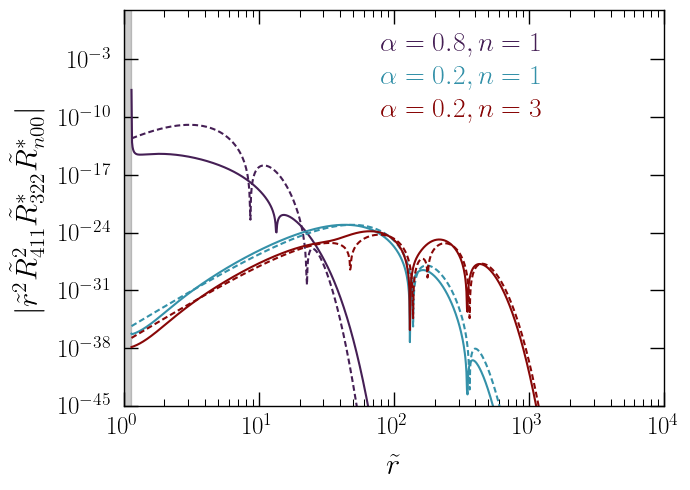

In [18]:
M=22

a=0.99

colorL = ["#451F55", "#880707", "#3491A9", "#5D9873", "#A1E887", "#6E71C4", "#393A10"]

fig, axs = plt.subplots(1, figsize=(7,5))


mu = 0.8 / (GNew * M)

fileL = np.loadtxt(dirN + "test_store/WF__0.8_n_1_l_0_m_0_.dat")
fileL1 = np.loadtxt(dirN + "test_store/WF__0.8_n_4_l_1_m_1_.dat")
fileL2 = np.loadtxt(dirN + "test_store/WF__0.8_n_3_l_2_m_2_.dat")
rlist = np.logspace(np.log10(fileL[0,0]), 4, 1000)
int1 = interp1d(np.log10(fileL[:,0]), np.log10(fileL[:,1]), fill_value="extrapolate", bounds_error=False)
int2 = interp1d(np.log10(fileL1[:,0]), np.log10(fileL1[:,1]), fill_value="extrapolate", bounds_error=False)
int3 = interp1d(np.log10(fileL2[:,0]), np.log10(fileL2[:,1]), fill_value="extrapolate", bounds_error=False)
plt.plot(rlist, rlist**2 * 10**int1(np.log10(rlist)) * 10**int2(np.log10(rlist)) * 10**int2(np.log10(rlist)) * 10**int3(np.log10(rlist)), colorL[0])

n=4
l=1
m=1
out4 = WF_small_test2(n, l, m, M, mu, a, rlist)
n=3
l=2
m=2
out3 = WF_small_test2(n, l, m, M, mu, a, rlist)
n=1
l=0
m=0
out0 = WF_small_test2(n, l, m, M, mu, a, rlist)
plt.plot(rlist, rlist**2 * out4**2 * out3 * out0, colorL[0], ls="--")

print(np.trapz(rlist**2 * 10**int1(np.log10(rlist)) * 10**int2(np.log10(rlist)) * 10**int2(np.log10(rlist)) * 10**int3(np.log10(rlist)), rlist), np.trapz(rlist**2 * out4**2 * out3 * out0, rlist))

mu = 0.2 / (GNew * M)

fileL = np.loadtxt(dirN + "test_store/WF__0.2_n_1_l_0_m_0_.dat")
fileL1 = np.loadtxt(dirN + "test_store/WF__0.2_n_4_l_1_m_1_.dat")
fileL2 = np.loadtxt(dirN + "test_store/WF__0.2_n_3_l_2_m_2_.dat")
rlist = np.logspace(np.log10(fileL[0,0]), 4, 1000)
int1 = interp1d(np.log10(fileL[:,0]), np.log10(fileL[:,1]), fill_value="extrapolate", bounds_error=False)
int2 = interp1d(np.log10(fileL1[:,0]), np.log10(fileL1[:,1]), fill_value="extrapolate", bounds_error=False)
int3 = interp1d(np.log10(fileL2[:,0]), np.log10(fileL2[:,1]), fill_value="extrapolate", bounds_error=False)
plt.plot(rlist, rlist**2 * 10**int1(np.log10(rlist)) * 10**int2(np.log10(rlist)) * 10**int2(np.log10(rlist)) * 10**int3(np.log10(rlist)), colorL[2])

n=4
l=1
m=1
out4 = WF_small_test2(n, l, m, M, mu, a, rlist)
n=3
l=2
m=2
out3 = WF_small_test2(n, l, m, M, mu, a, rlist)
n=1
l=0
m=0
out0 = WF_small_test2(n, l, m, M, mu, a, rlist)
plt.plot(rlist, rlist**2 * out4**2 * out3 * out0, colorL[2], ls="--")

print(np.trapz(rlist**2 * 10**int1(np.log10(rlist)) * 10**int2(np.log10(rlist)) * 10**int2(np.log10(rlist)) * 10**int3(np.log10(rlist)), rlist), np.trapz(rlist**2 * out4**2 * out3 * out0, rlist))

fileL = np.loadtxt(dirN + "test_store/WF__0.2_n_3_l_0_m_0_.dat")
fileL1 = np.loadtxt(dirN + "test_store/WF__0.2_n_4_l_1_m_1_.dat")
fileL2 = np.loadtxt(dirN + "test_store/WF__0.2_n_3_l_2_m_2_.dat")
rlist = np.logspace(np.log10(fileL[0,0]), 4, 1000)
int1 = interp1d(np.log10(fileL[:,0]), np.log10(fileL[:,1]), fill_value="extrapolate", bounds_error=False)
int2 = interp1d(np.log10(fileL1[:,0]), np.log10(fileL1[:,1]), fill_value="extrapolate", bounds_error=False)
int3 = interp1d(np.log10(fileL2[:,0]), np.log10(fileL2[:,1]), fill_value="extrapolate", bounds_error=False)
plt.plot(rlist, rlist**2 * 10**int1(np.log10(rlist)) * 10**int2(np.log10(rlist)) * 10**int2(np.log10(rlist)) * 10**int3(np.log10(rlist)), colorL[1])

n=4
l=1
m=1
out4 = WF_small_test2(n, l, m, M, mu, a, rlist)
n=3
l=2
m=2
out3 = WF_small_test2(n, l, m, M, mu, a, rlist)
n=3
l=0
m=0
out0 = WF_small_test2(n, l, m, M, mu, a, rlist)
plt.plot(rlist, rlist**2 * out4**2 * out3 * out0, colorL[1], ls="--")

print(np.trapz(rlist**2 * 10**int1(np.log10(rlist)) * 10**int2(np.log10(rlist)) * 10**int2(np.log10(rlist)) * 10**int3(np.log10(rlist)), rlist), np.trapz(rlist**2 * out4**2 * out3 * out0, rlist))

xx = np.linspace(1, fileL[0,0], 10)
axs.fill_between(x=xx, y1=0, y2=1e4, color='k',  interpolate=True, alpha=.2)

plt.text(80, 1e-2, r"$\alpha = 0.8, n = 1$", rotation=0, fontsize=20, c=colorL[0])
plt.text(80, 1e-6, r"$\alpha = 0.2, n = 1$", rotation=0, fontsize=20, c=colorL[2])
plt.text(80, 1e-10, r"$\alpha = 0.2, n = 3$", rotation=0, fontsize=20, c=colorL[1])



plt.yscale("log")
plt.xscale("log")
plt.ylim([1e-45,1e3])
plt.xlim([1.0,1e4])



plt.xlabel(r"$\tilde{r}$", fontsize=22)
plt.ylabel(r"$|\tilde{r}^2 \tilde{R}_{411}^2 \tilde{R}_{322}^* \tilde{R}_{n00}^*|$", fontsize=22)

plt.tight_layout()
plt.savefig("plts/WF_3.pdf", dpi=200)

In [64]:
t3

array([[1.43603693e+00,            nan],
       [1.43604602e+00,            nan],
       [1.43605511e+00,            nan],
       ...,
       [4.05329941e+04,            nan],
       [4.05331377e+04,            nan],
       [4.05332813e+04,            nan]])

(1, 100000.0)

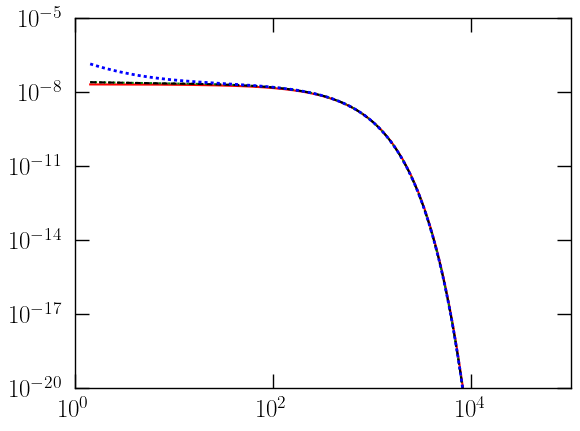

In [72]:
t1=np.loadtxt("test_store/test_NR.dat") # 
t2=np.loadtxt("test_store/test_R.dat") # 
t3=np.loadtxt("test_store/test_Out.dat") #
t4=np.loadtxt("test_store/test_Out_NR.dat") #

#t2_new = t2[100000:,:]
#nm = np.trapz(t2_new[:,1]**2 * t2_new[:,0]**2, t2_new[:,0])
#nmC = np.trapz(t1[:,1]**2 * t1[:,0]**2, t1[:,0])
#nmC2 = np.trapz(t3[:,1]**2 * t3[:,0]**2, t3[:,0])
# print(nm, nmC, nmC2)


plt.plot(t1[:,0], np.abs(t1[:,1]), "r") 
plt.plot(t2[:,0], np.abs(t2[:,1]) , "g", ls="dotted")
# plt.plot(t2_new[:,0], np.abs(t2_new[:,1] / np.sqrt(nm)) , "b", ls="dotted")
plt.plot(t3[:,0], np.abs(t3[:,1]), "k", ls='--')
plt.plot(t4[:,0], np.abs(t4[:,1]), "b", ls='dotted', lw=2)

testr = np.logspace(1,4,100)
alpha = 0.049
checkc = np.exp(- testr * (alpha**2))
nm = np.trapz(checkc**2 * testr**2 , testr)
# plt.plot(testr, checkc / np.sqrt(nm))

plt.yscale("log")
plt.xscale("log")
plt.ylim([1e-20,1e-5])
plt.xlim([1,1e5])

(1, 20)

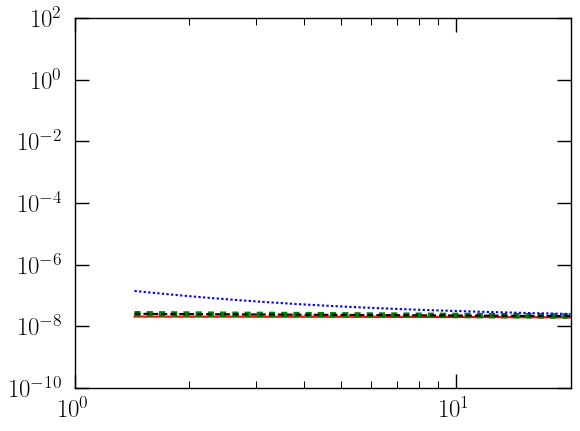

In [73]:
plt.plot(t1[:,0], np.abs(t1[:,1]), "r") 
plt.plot(t2[:,0], np.abs(t2[:,1]) , "g", ls="dotted",lw=4)
# plt.plot(t2_new[:,0], np.abs(t2_new[:,1] / np.sqrt(nm)) , "b", ls="dotted")
plt.plot(t3[:,0], np.abs(t3[:,1]), "k", ls='--')
plt.plot(t4[:,0], np.abs(t4[:,1]), "b", ls='dotted')

testr = np.logspace(1,4,100)
alpha = 0.049
checkc = np.exp(- testr * (alpha**2))
nm = np.trapz(checkc**2 * testr**2 , testr)
# plt.plot(testr, checkc / np.sqrt(nm))

plt.yscale("log")
plt.xscale("log")
plt.ylim([1e-10,1e2])
plt.xlim([1,20])

In [20]:
np.sqrt(np.abs(t1[:,1] / np.sqrt(nnm))) 

array([2.68869824e+00, 2.68808270e+00, 2.68746620e+00, ...,
       1.01946522e-20, 1.01946486e-20, 1.01946450e-20])

In [45]:
t2

array([[1.47150659e+000,             inf],
       [3.72826761e+000,             inf],
       [1.43044919e+001,             inf],
       ...,
       [4.05045649e+004,             inf],
       [4.05189231e+004, 4.41286927e-172],
       [4.05332813e+004, 4.40974346e-172]])

In [15]:
nnm = np.trapz(t1[:,1]**2 * t1[:,0]**2, t1[:,0])

In [96]:
t1=np.loadtxt("test_store/test_RAD_v2.dat") # 
t2=np.loadtxt("test_store/test_RAD_NR_v2.dat") # 

t1_v1=np.loadtxt("test_store/test_RAD.dat") # 
t2_v1=np.loadtxt("test_store/test_RAD_NR.dat") # 
scs_test = np.loadtxt("test_store/scs_test.dat")

rec = np.loadtxt("test_store/AttemptWF.dat")
rectest = np.loadtxt("test_store/AttemptWF_err.dat")
c1 = np.loadtxt("test_store/check1.dat")
s1 = np.loadtxt("test_store/ss_check1.dat")
c2 = np.loadtxt("test_store/check2.dat")
s2 = np.loadtxt("test_store/ss_check2.dat")
srst = np.loadtxt("test_store/Srs_test.dat")


test_fwd = np.loadtxt("test_store/test_RAD_NR_old.dat")

GNew = 7484169213.94

(1, 1000000.0)

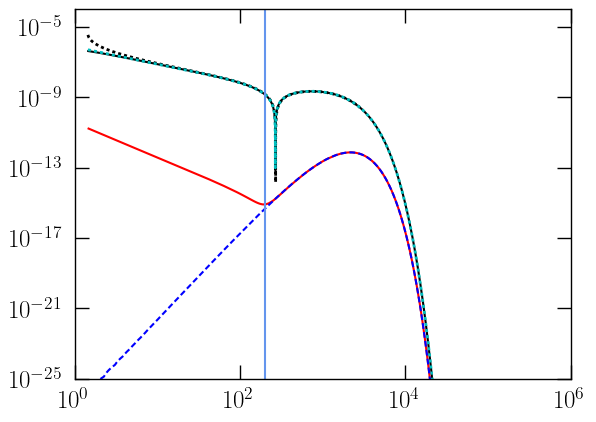

In [97]:


plt.plot(t2[:,0], np.sqrt(np.abs(t2[:,1])) * GNew * 22.2, "k")
plt.plot(t1[:,0], np.sqrt(np.abs(t1[:,1] )) * GNew * 22.2, "k", lw=2, ls="dotted")

plt.plot(test_fwd[:,0], np.sqrt(np.abs(test_fwd[:,1])) * GNew * 22.2, "c", lw=2, ls="dotted")


plt.plot(c1[:,0], np.abs(c1[:,1]), "r")

plt.plot(s2[:,0], s2[:,1], "b", ls="dashed")
#plt.plot(s1[:,0], s1[:,1], "b", ls="dashed")


plt.vlines(2e2, 0, 1)


plt.yscale("log")
plt.xscale("log")
plt.ylim([1e-25,1e-4])
#plt.xlim([1.43588,1.4361])
plt.xlim([1,1e6])

(1, 10000.0)

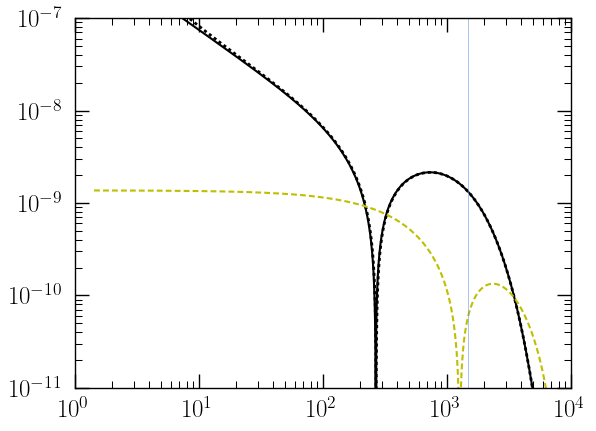

In [86]:


plt.plot(t2[:,0], np.sqrt(np.abs(t2[:,1])) * GNew * 22.2, "k")
plt.plot(t1[:,0], np.sqrt(np.abs(t1[:,1] )) * GNew * 22.2, "k", lw=2, ls="dotted")

#plt.plot(test_fwd[:,0], np.sqrt(np.abs(test_fwd[:,1])) * GNew * 22.2, "c", lw=2, ls="dotted")


plt.plot(rec[:,0], np.abs(rec[:,1] * GNew * 22.2) / (2*np.pi), "y", ls="dashed")


plt.vlines(1.5e3, 0, 1,lw=0.4)

plt.yscale("log")
plt.xscale("log")
plt.ylim([1e-11,1e-7])
#plt.xlim([1.43588,1.4361])
plt.xlim([1,1e4])

48.48042842171926


(1, 100000.0)

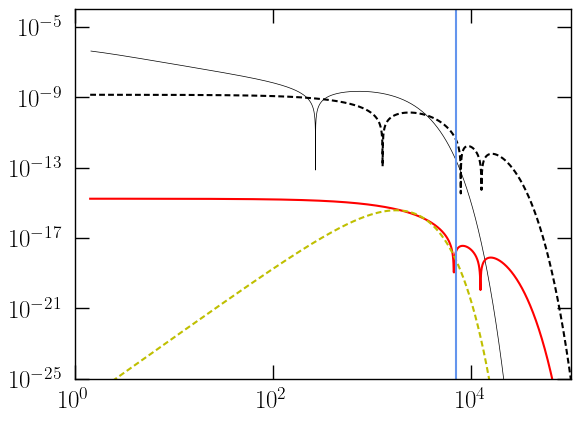

In [87]:
#plt.plot(t1[:,0], np.sqrt(np.abs(t1[:,1])) * GNew * 22.2, "k")
plt.plot(t2[:,0], np.sqrt(np.abs(t2[:,1])) * GNew * 22.2, "k" , lw=.5)

plt.plot(rec[:,0], np.abs(rec[:,1] * GNew * 22.2) / (2*np.pi), "k", ls="dashed")

print(np.sqrt(np.max(np.abs(t2[:,1]))) /  np.max(np.abs((rec[:,1])) ))

plt.plot(rectest[:,0], np.abs(rectest[:,1]) / (2*np.pi), "r")
plt.plot(srst[:,0], srst[:,1], "y", ls="dashed")

plt.vlines(7e3, 0, 1)

plt.yscale("log")
plt.xscale("log")
plt.ylim([1e-25,1e-4])
#plt.xlim([1.43588,1.4361])
plt.xlim([1,1e5])

(1, 100000.0)

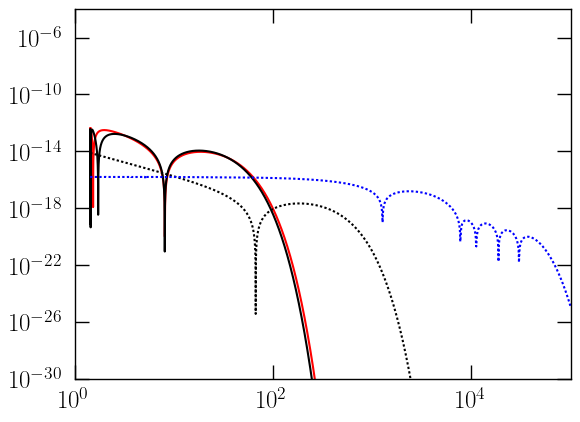

In [700]:


plt.plot(t1[:,0], (t1[:,1]), "r")
plt.plot(t2[:,0], (t2[:,1]), "k")

#plt.plot(t1_v1[:,0], (t1_v1[:,1]), "r", ls="dotted")
plt.plot(t2_v1[:,0], (t2_v1[:,1]), "k", ls="dotted")

plt.plot(rec[:,0], np.abs(rec[:,1]) * 1e15, "blue", ls="dotted")




plt.yscale("log")
plt.xscale("log")
plt.ylim([1e-30,1e-4])
#plt.xlim([1.43588,1.4361])
plt.xlim([1,1e5])

(1.4, 2.05)

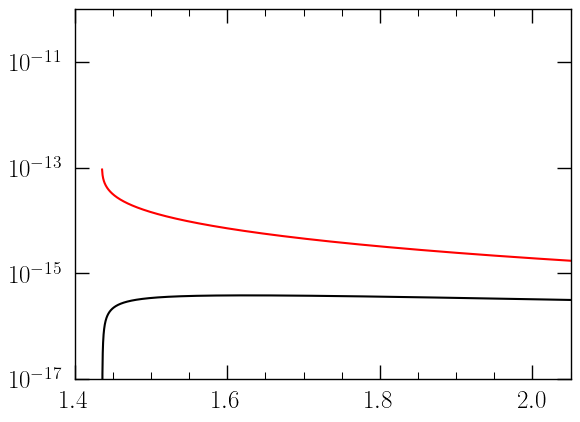

In [635]:
plt.plot(t1[:,0], np.abs(t1[:,1]), "r")
plt.plot(t2[:,0], np.abs(t2[:,1]), "k")



plt.yscale("log")
#plt.xscale("log")
plt.ylim([1e-17,1e-10])
# plt.xlim([1.43588,1.436])
plt.xlim([1.4,2.05])

(1.431, 1000)

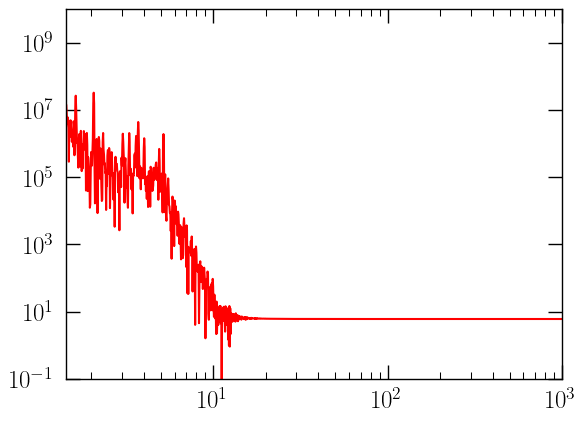

In [664]:
plt.plot(rectest[:,0], np.abs(rectest[:,1]), "r")


plt.yscale("log")
plt.xscale("log")
plt.ylim([1e-1,1e10])
# plt.xlim([1.43588,1.436])
plt.xlim([1.431,1000])

(1, 4000.0)

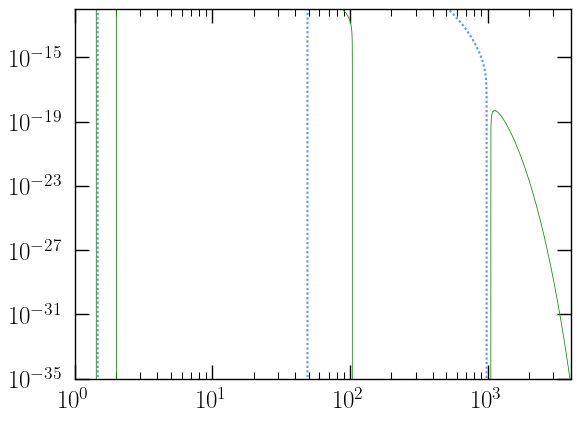

In [567]:
tt= np.loadtxt("test_store/test_Rreal.dat")
tt2= np.loadtxt("test_store/test_dRreal.dat")
plt.plot(tt[:,0], (tt[:,1]), ls="dotted")
plt.plot(tt2[:,0], (tt2[:,1]), lw=.6)

#plt.plot(tt[:,0], (-tt[:,1]))
#plt.plot(tt2[:,0], (-tt2[:,1]), lw=.6, ls="dotted")

plt.yscale("log")
plt.xscale("log")
plt.ylim([1e-35, 1e-12])
plt.xlim([1, 4e3])

(1.3, 2.0)

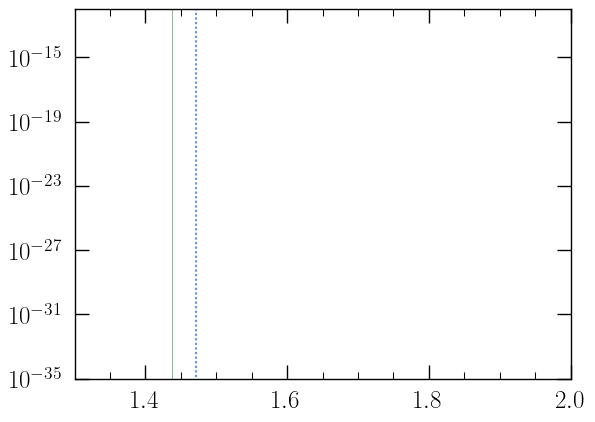

In [514]:
tt= np.loadtxt("test_store/test_Rreal.dat")
tt2= np.loadtxt("test_store/test_dRreal.dat")
plt.plot(tt[:,0], (tt[:,1]), ls="dotted")
plt.plot(tt2[:,0], (tt2[:,1]), lw=.4)
plt.yscale("log")
#plt.xscale("log")
plt.ylim([1e-35, 1e-12])
plt.xlim([1.3, 2])

In [515]:
idx=2050
print(tt[idx], tt2[idx])

[7.84666255e+01 1.21062410e-10] [7.84666255e+01 1.82453191e-12]


In [206]:
from scipy.ndimage import median_filter
from scipy.signal import savgol_filter


In [216]:
#out=mean_filter(np.log10(tt[:,1]), size=150)
yhat = savgol_filter(np.log10(tt[:,1]), 40, 3) # window size 51, polynomial order 3

(1, 10000.0)

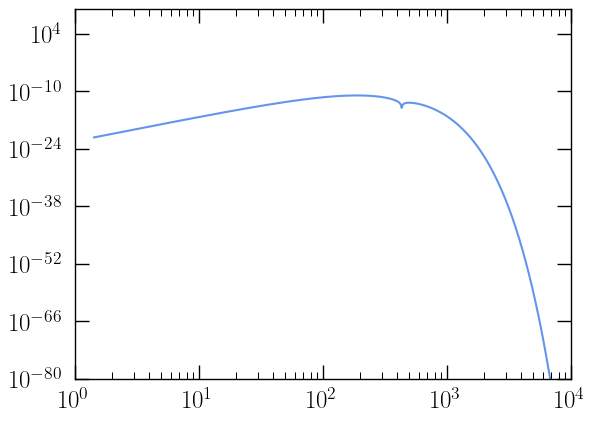

In [502]:
tt= np.loadtxt("test_store/source_test.dat")
tt2= np.loadtxt("test_store/source_test_i.dat")
plt.plot(tt[:,0], np.abs(tt[:,1]))
plt.plot(tt2[:,0], np.abs(tt2[:,1]))
plt.yscale("log")
plt.xscale("log")
plt.ylim([1e-80, 1e10])
plt.xlim([1, 1e4])

In [414]:
t1=np.loadtxt("test_store/test_test.dat") # 
#t2=np.loadtxt("test_store/test_RAD_1.dat") # 
#t3=np.loadtxt("test_store/test_RAD_2.dat") # 
#t4=np.loadtxt("test_store/test_RAD_3.dat") # 

(1, 100000.0)

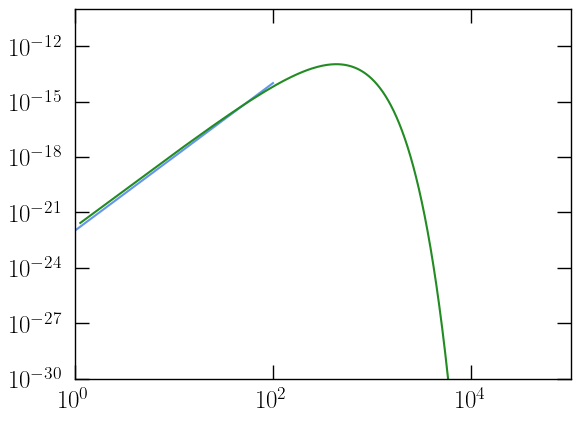

In [415]:
xx = np.logspace(0,2,100)
yy = 1e-22* xx**4

plt.plot(xx,yy)

plt.plot(t1[:,0], t1[:,1])
plt.yscale("log")
plt.xscale("log")
plt.ylim([1e-30, 1e-10])
plt.xlim([1, 1e5])

(0.1, 40000.0)

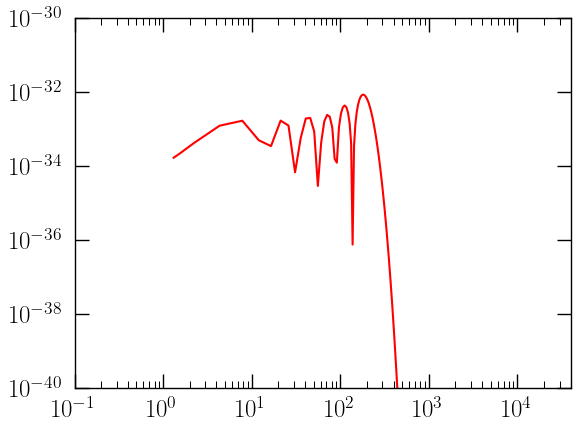

In [7]:
tt = np.loadtxt("test_store/test_1.dat")
# tt2 = np.loadtxt("test_store/test_2.dat")
# tt3 = np.loadtxt("test_store/test_3.dat")
# tt4 = np.loadtxt("test_store/test_4.dat")

plt.plot(tt[:,0], np.abs( tt[:,1]*tt[:,0]**2 ), "r")
# plt.plot(tt2[:,0], np.abs( tt2[:,1]) )
# plt.plot(tt3[:,0], np.abs( tt3[:,1]) )
# plt.plot(tt4[:,0], np.abs( tt4[:,1]) )

plt.yscale("log")
plt.xscale("log")
plt.ylim([1e-40, 1e-30])
plt.xlim([0.1, 4e4])

(0.01, 1000000.0)

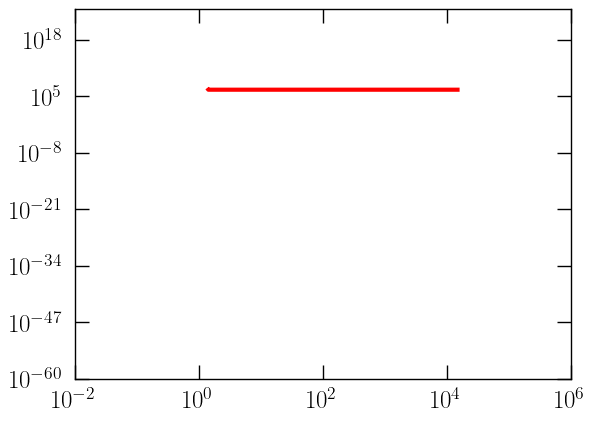

In [6]:
tt = np.loadtxt("test_store/testW_r.dat")
tt2 = np.loadtxt("test_store/testW_i.dat")
# wrokT = np.loadtxt("test_store/test_3.dat")
# wrokT2 = np.loadtxt("test_store/test_4.dat")



plt.plot(tt[:,0], np.abs( tt[:,1]), "r", lw=3)



plt.yscale("log")
plt.xscale("log")
plt.ylim([1e-60, 1e25])
plt.xlim([0.01, 1e6])
# plt.xlim([-100, 400])

(0.01, 100000.0)

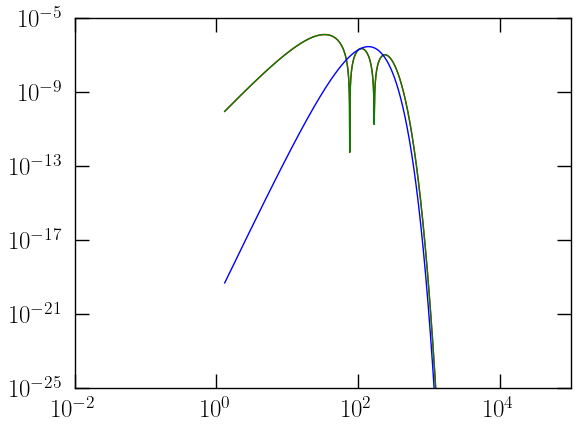

In [20]:
tt = np.loadtxt("test_store/test1.dat")
tt2 = np.loadtxt("test_store/test2.dat")
tt3 = np.loadtxt("test_store/test3.dat")
# wrokT = np.loadtxt("test_store/test_3.dat")
# wrokT2 = np.loadtxt("test_store/test_4.dat")



plt.plot(tt[:,0], tt[:,1], "r", lw=1)
plt.plot(tt[:,0], tt2[:,1], "g", lw=1)
plt.plot(tt[:,0], tt3[:,1], "b", lw=1)



plt.yscale("log")
plt.xscale("log")
plt.ylim([1e-25, 1e-5])
plt.xlim([0.01, 1e5])
# plt.xlim([-100, 400])

In [189]:
wrokT[1, 1] / wrokT[-1,1]

2.2467763269080294e-07

In [4]:
tt[:,1]* tt[:,0]**2 

array([6.15408497e+06, 6.16535505e+06, 6.15009102e+06, ...,
       6.69548588e+14, 6.69561407e+14, 6.69574225e+14])